<a href="https://colab.research.google.com/github/Aashima02/mnist-classification/blob/main/DL_Exp_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
single_image = X_train[7]

In [ ]:
single_image.shape

(28, 28)

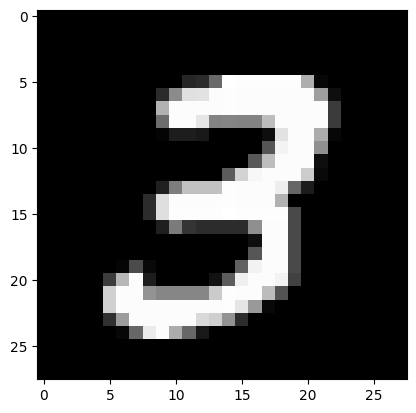

In [ ]:
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()

255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()

0.0

In [ ]:
X_train_scaled.max()

1.0

In [ ]:
y_train[7]

3

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train_onehot.shape

(60000, 10)

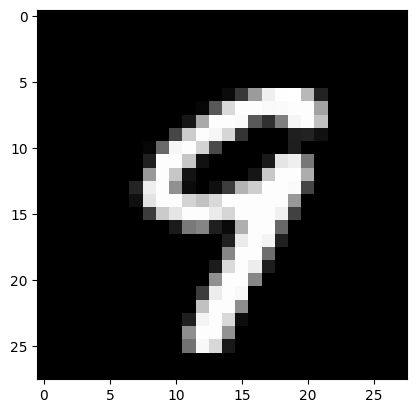

In [ ]:
single_image = X_train[727]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[727]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=45,kernel_size=(5,5),activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(65,activation="relu"))
model.add(layers.Dense(80,activation="relu"))
model.add(layers.Dense(25,activation="relu"))
model.add(layers.Dense(10,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 45)        1170      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 45)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 6480)              0         
                                                                 
 dense (Dense)               (None, 65)                421265    
                                                                 
 dense_1 (Dense)             (None, 80)                5280      
                                                                 
 dense_2 (Dense)             (None, 25)                2025      
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')


In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=8,
          batch_size=70,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/8
858/858 [==============================] - 44s 49ms/step - loss: 0.2307 - accuracy: 0.9299 - val_loss: 0.0681 - val_accuracy: 0.9795
Epoch 2/8
858/858 [==============================] - 39s 46ms/step - loss: 0.0598 - accuracy: 0.9815 - val_loss: 0.0472 - val_accuracy: 0.9861
Epoch 3/8
858/858 [==============================] - 38s 45ms/step - loss: 0.0401 - accuracy: 0.9876 - val_loss: 0.0426 - val_accuracy: 0.9869
Epoch 4/8
858/858 [==============================] - 37s 44ms/step - loss: 0.0309 - accuracy: 0.9903 - val_loss: 0.0422 - val_accuracy: 0.9864
Epoch 5/8
858/858 [==============================] - 38s 45ms/step - loss: 0.0249 - accuracy: 0.9919 - val_loss: 0.0379 - val_accuracy: 0.9877
Epoch 6/8
858/858 [==============================] - 39s 45ms/step - loss: 0.0177 - accuracy: 0.9940 - val_loss: 0.0380 - val_accuracy: 0.9887
Epoch 7/8
858/858 [==============================] - 38s 44ms/step - loss: 0.0158 - accuracy: 0.9947 - val_loss: 0.0355 - val_accuracy: 0.9890

In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.230671,0.929900,0.068076,0.9795
1,0.059757,0.981517,0.047206,0.9861
2,0.040067,0.987567,0.042644,0.9869
3,0.030936,0.990317,0.042165,0.9864
4,0.024942,0.991950,0.037897,0.9877


<Axes: >

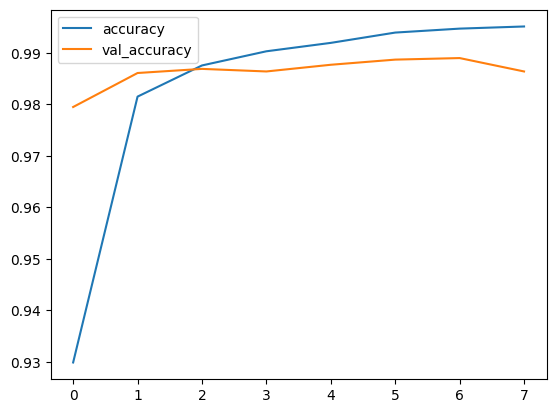

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

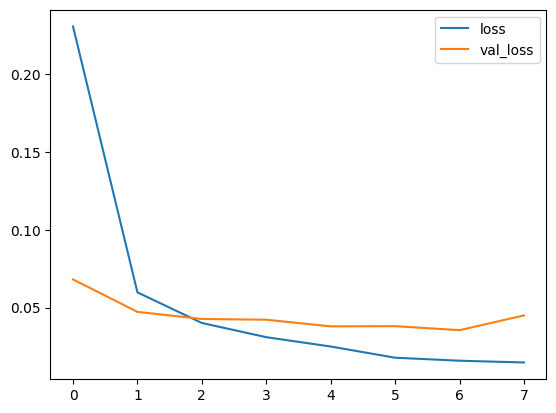

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 3s 9ms/step


In [ ]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 967    0    1    0    0    3    2    1    4    2]
 [   0 1123    0    2    0    2    1    0    7    0]
 [   0    0 1021    1    0    0    0    5    5    0]
 [   0    0    2  996    0    6    0    0    4    2]
 [   0    1    0    0  965    0    1    1    2   12]
 [   0    0    0    4    0  873    1    0    7    7]
 [   3    2    0    0    2    1  946    0    4    0]
 [   0    1   10    0    0    0    0 1006    4    7]
 [   1    0    1    0    0    0    0    0  968    4]
 [   0    0    0    0    2    4    0    0    4  999]]


In [ ]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.96      0.99      0.98       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
## Prediction for a single input

In [ ]:
img = image.load_img('jkseven.jpg')

In [ ]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
img = image.load_img('jkseven.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 23ms/step


In [ ]:
print(x_single_prediction)

[2]


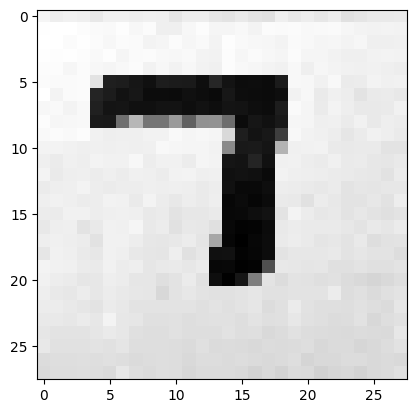

In [ ]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [ ]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 21ms/step


In [ ]:
print(x_single_prediction)

[7]


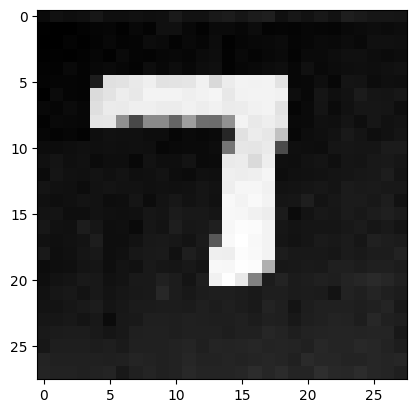

In [ ]:
plt.imshow(img_28_gray_inverted_scaled.reshape(28,28),cmap='gray')